# Введение в машинное обучение для Java-разработчиков
### Практическое задание 3. Нейронные сети.
### Дата выдачи: 2.11.2023

### Дедлайн: 23:59MSK 23.11.2023

## О задании
В этом задании мы попытаемся разобраться в устройстве двухслойной нейронной сети.

## Оценивание и штрафы
См. оценки в следующей ячейке

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов, что автоматически ведет к несдаче курса. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в комментариях. 
В данном задании есть необязательные бонусные задания, выполнение которых добавляет баллы в карму :)

## Формат сдачи
Задания сдаются путем форка основного репозитория, коммита решения в мастер-ветку вашего форка и оповещении преподавателя о выполнении ДЗ. 

## Часть 1. Двухслойная нейронная сеть для задачи бинарной классификации.

На первом слое используюйте функцию активации ReLU, на выходном - sigmoid

##### На оценку "удовлетворительно" необходимо реализовать следующие функции:

- [task] - функция активации ReLU
- [task] - функция активации Sigmoid
- [task] - функция бинарной кросс-энтропи

  
#####  На оценку "хорошо" необходимо реализовать следующие функции:
- [task] - реализуйте функцию прямого прохода сети

#####  На оценку "отлично" необходимо реализовать следующие функции:
 - [task] - реализуйте функцию обратного прохода сети. Необходимо реализовать расчет градиентов для всех весов (легче всего это сделать в матричной форме), используя свойства расчета производной от сложной функции.
 - [task] - реализуйте обучение нейронной сети. Сделайте цикл по "эпохам", а рамках эпохи перебирайте последовательно все объекты обучающей выборки. Далее на каждом объекте считайте функцию потерь и градиенты.

In [1]:
import numpy as np


class TwoLayerNeuralNetwork:
    def __init__(self, input_size=2, hidden_size=2, output_size=1):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros(hidden_size)
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros(output_size)

    def ReLU(self, x):
        return np.maximum(0, x)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def binary_cross_entropy_loss(self, y_true, y_pred):
        return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
    def forward(self, X):
        self.z1 = X.dot(self.W1) + self.b1
        self.a1 = self.ReLU(self.z1)
        self.z2 = self.a1.dot(self.W2) + self.b2
        return  self.sigmoid(self.z2)

    def backward(self, X, y, learning_rate=0.1):
        y_pred = self.forward(X)
        dl_dy = y_pred - y
        dl_dz2 = dl_dy * self.sigmoid(self.z2) * (1 - self.sigmoid(self.z2))
        dl_dW2 = self.a1.T.dot(dl_dz2)
        dl_db2 = np.sum(dl_dz2, axis=0)

        dl_da1 = dl_dz2.dot(self.W2.T)
        dl_dz1 = dl_da1 * (self.z1 > 0)
        dl_dW1 = X.T.dot(dl_dz1)
        dl_db1 = np.sum(dl_dz1, axis=0)

        self.W2 -= learning_rate * dl_dW2
        self.b2 -= learning_rate * dl_db2
        self.W1 -= learning_rate * dl_dW1
        self.b1 -= learning_rate * dl_db1

        
    def fit(self, X, y, num_epochs=100, learning_rate=0.1):
        for i in range(num_epochs):
            y_pred = self.forward(X)
            loss = self.binary_cross_entropy_loss(y, y_pred)
            self.backward(X, y, learning_rate)

            print("loss: {}".format(i, loss))

## Часть 2. Двухслойная нейронная сеть 

Попробуйте обучить реализацию вашей сети на небольшом синтетическом датасете.

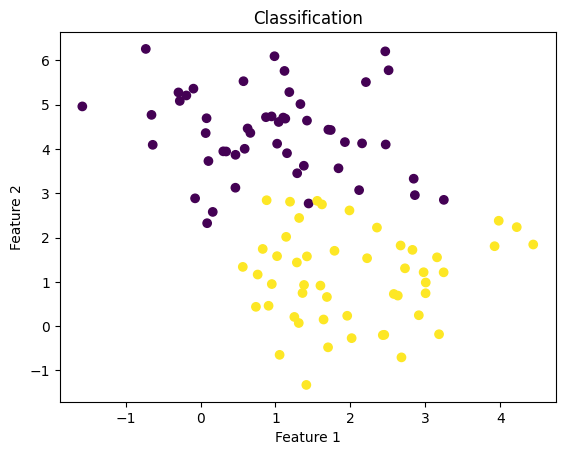

ValueError: shapes (100,100) and (1,2) not aligned: 100 (dim 1) != 1 (dim 0)

In [2]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Сlassification")
plt.show()

model = TwoLayerNeuralNetwork()
model.fit(X, y, num_epochs=100, learning_rate=0.1)